Epoch 1/50 - Train Loss: 0.0466
Epoch 1 - Eval Metric (Train Loss): 0.0466
Epoch 2/50 - Train Loss: 0.0313
Epoch 2 - Eval Metric (Train Loss): 0.0313
Epoch 3/50 - Train Loss: 0.0278
Epoch 3 - Eval Metric (Train Loss): 0.0278
Epoch 4/50 - Train Loss: 0.0263
Epoch 4 - Eval Metric (Train Loss): 0.0263
Epoch 5/50 - Train Loss: 0.0254
Epoch 5 - Eval Metric (Train Loss): 0.0254
Epoch 6/50 - Train Loss: 0.0247
Epoch 6 - Eval Metric (Train Loss): 0.0247
Epoch 7/50 - Train Loss: 0.0242
Epoch 7 - Eval Metric (Train Loss): 0.0242
Epoch 8/50 - Train Loss: 0.0237
Epoch 8 - Eval Metric (Train Loss): 0.0237
Epoch 9/50 - Train Loss: 0.0234
Epoch 9 - Eval Metric (Train Loss): 0.0234
Epoch 10/50 - Train Loss: 0.0230
Epoch 10 - Eval Metric (Train Loss): 0.0230
Epoch 11/50 - Train Loss: 0.0228
Epoch 11 - Eval Metric (Train Loss): 0.0228
Epoch 12/50 - Train Loss: 0.0225
Epoch 12 - Eval Metric (Train Loss): 0.0225
Epoch 13/50 - Train Loss: 0.0223
Epoch 13 - Eval Metric (Train Loss): 0.0223
Epoch 14/50 - Tra

Epoch 50/50 - Train Loss: 0.0192
Epoch 50 - Eval Metric (Train Loss): 0.0192
Saving best state with metric: 0.0192
Checkpoint saved at step 50 in directory '/Users/uribagi/Documents/GitHub/Latent-IQP/weights/binary_vae_50epoch_3e-4lr/checkpoint_50'
Checkpoint saved at the end of training: /Users/uribagi/Documents/GitHub/Latent-IQP/weights/binary_vae_50epoch_3e-4lr/checkpoint_50


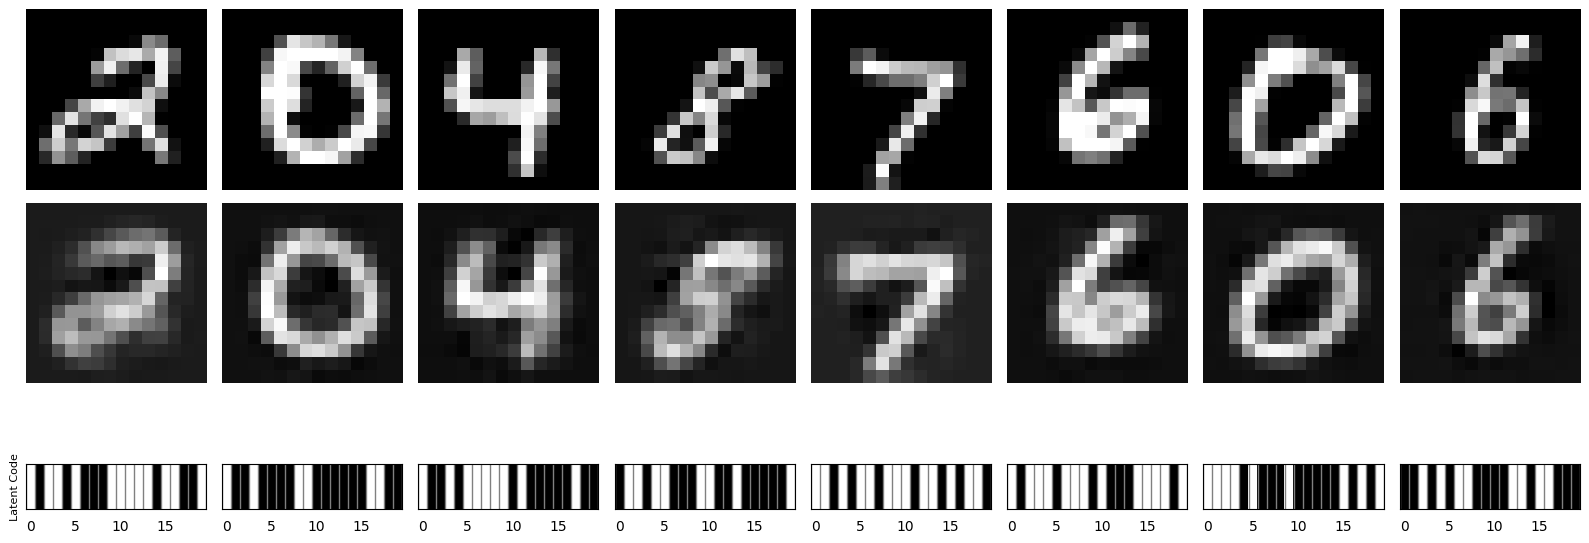

2025-04-07 09:27:51.186457: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [1]:
from jax import random
from datasets.mnist import MNISTDataset
from src.autoencoders.simple_vae import model
from src.utils.autoencoder_trainer import AutoencoderTrainer

rng = random.PRNGKey(0)
binary_vae = model(latents=20)
input_shape = (64, 196)
learning_rate = 3e-4

# Load MNIST dataset for training and testing
train_dataset = MNISTDataset(split='train', batch_size=64, image_size=(14, 14)).load()
test_dataset = MNISTDataset(split='test', batch_size=64, image_size=(14, 14)).load()

# Create an instance of the trainer with your binary VAE model
trainer = AutoencoderTrainer(binary_vae, learning_rate, rng, input_shape)

# Train the model for 10 epochs
trainer.train(train_dataset, batch_size=64, num_epochs=50, run_dir="weights/binary_vae_50epoch_3e-4lr")

# Plot some reconstructions from the test dataset
trainer.plot_reconstructions(test_dataset, num_images=8)